In [ ]:
# 해당 코드가 tensorflow 2.5.0 버전에서만 동작하므로 2.5.0 버전으로 설치
!pip install tensorflow==2.5.0

In [1]:
# MNIST 데이터셋과 tensorflow 라이브러리 불러오기
import matplotlib.pyplot as plt  
from tensorflow.keras.datasets import mnist  
from tensorflow.keras.utils import to_categorical  
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense  
from tensorflow.keras.models import load_model  

In [2]:
# 데이터셋 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# 데이터셋 차원 확인
print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 28, 28)
print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000,)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 28, 28)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000,)

X_train_shape: (60000, 28, 28)
y_train_shape: (60000,)
X_test_shape: (10000, 28, 28)
y_test_shape: (10000,)


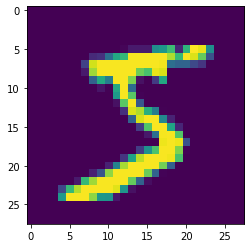

In [4]:
plt.imshow(X_train[0])
plt.show()

In [5]:
input_shape = X_train.shape[1] * X_train.shape[2]  # 그림의 크기: 28 * 28
number_of_classes = len(set(y_train))  # 레이블의 종류. 0~9로 10개

X_train = X_train / 255.0
X_test = X_test / 255
X_train = X_train.reshape(-1, input_shape)  # 3차원 -> 2차원
X_test = X_test.reshape(-1, input_shape)

print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 784)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 784)

X_train_shape: (60000, 784)
X_test_shape: (10000, 784)


In [6]:
y_train = to_categorical(y_train, number_of_classes)  
# 원-핫 인코딩. 1차원 -> 2차원
y_test = to_categorical(y_test, number_of_classes)

print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000, 10)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000, 10)

y_train_shape: (60000, 10)
y_test_shape: (10000, 10)


In [7]:
model = Sequential()  # 모델 선언

In [8]:
# 완전연결층 추가. 처음 쌓는 레이어는 input_shape: 데이터 차원(개수 제외)을 적어줘야함.
model.add(Dense(128, activation="relu", input_shape=X_train.shape[1:]))

# 출력하는 완전연결층 추가. 다중분류이므로, softmax 활성화함수 사용
model.add(Dense(y_train.shape[1], activation="softmax"))

In [9]:
# 모델 컴파일. 다중분류이므로 categorical_crossentropy, 정확도 표기
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["acc"])

In [10]:
model.summary()  # 간단하게 요약해 출력

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
loss, acc = model.evaluate(X_test, y_test)  

Epoch 1/10
1500/1500 [==============================] - 3s 1ms/step - loss: 0.2832 - acc: 0.9203 - val_loss: 0.1661 - val_acc: 0.9512
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1256 - acc: 0.9635 - val_loss: 0.1205 - val_acc: 0.9650
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0873 - acc: 0.9747 - val_loss: 0.1043 - val_acc: 0.9694
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0646 - acc: 0.9804 - val_loss: 0.0995 - val_acc: 0.9712
Epoch 5/10
1500/1500 [==============================] - 1s 972us/step - loss: 0.0512 - acc: 0.9840 - val_loss: 0.0894 - val_acc: 0.9732
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0384 - acc: 0.9881 - val_loss: 0.0991 - val_acc: 0.9721
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0312 - acc: 0.9906 - val_loss: 0.0970 - val_acc: 0.9735
Epoch 8/10
1500/1500 [==============================] - 2s 1

In [12]:
# 학습 완료 후 검증
print("손실률:", loss)  # 손실률: 0.08662549406290054
print("정확도:", acc)  # 정확도: 0.9779999852180481

손실률: 0.08576957136392593
정확도: 0.9778000116348267


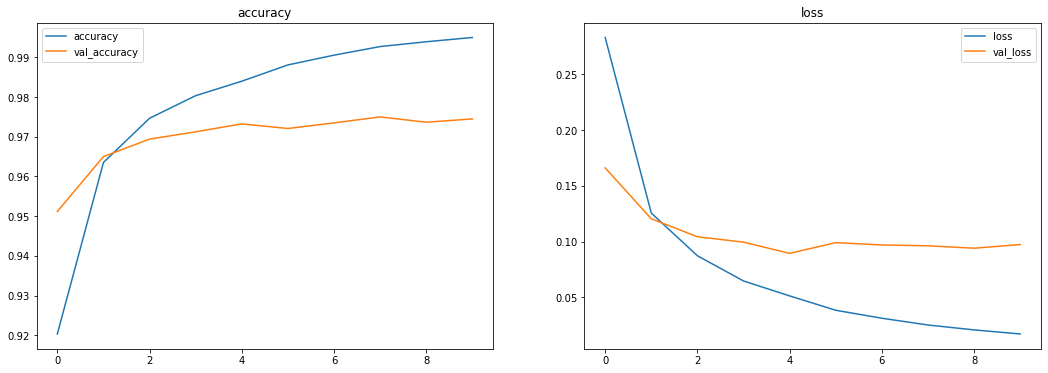

In [13]:
plt.figure(figsize=(18, 6))

# 에포크별 정확도
plt.subplot(1,2,1)
plt.plot(history.history["acc"], label="accuracy")
plt.plot(history.history["val_acc"], label="val_accuracy")
plt.title("accuracy")
plt.legend()

# 에포크별 손실률
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()

In [14]:
# 모델 저장
model.save('/content/model.h5')
loaded_model = load_model('/content/model.h5')

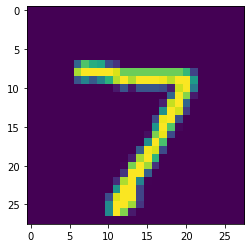

In [15]:
# 모델 테스트
plt.imshow(X_test[0].reshape(28, 28))  # 데이터 일자로 펴주기
plt.show()

In [18]:
pred = model.predict(X_test[:1])[0]  

print("real:", y_test[0].argmax())  # 7
print("predict:", pred.argmax())  # 7

real: 7
predict: 7
